In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
from MultiClassCSBM import MultiClassCSBM
from CSBMFeat import CSBMFeat
from CSBMcl import CSBMcl
from metrics import mmd_rbf

In [2]:
dimensions = 20
gamma = 2 * dimensions
n = 100

In [3]:
def get_pairwise_mean_distance(csbm):
    means = csbm.means
    c = csbm.classes
    distance = 0
    count = 0
    for i in range(c):
        for j in range(c):
            if i == j:
                continue
            distance += np.linalg.norm(means[i] - means[j])
            count += 1
    return distance / count

In [4]:
def get_mean_initialiation_distance(csbm):
    means = csbm.means
    init = csbm.initial_means
    c = csbm.classes
    distance = 0
    count = 0
    for i in range(c):
            distance += np.linalg.norm(means[i] - init[i])
            count += 1
    return distance / count

In [5]:
def get_pairwise_neighbor_mean_distance(csbm):
    means = csbm.means
    c = csbm.classes
    distance = 0
    count = 0
    for i in range(c):
            distance += np.linalg.norm(means[i] - means[(i + 1) % c])
            count += 1
    return distance / count

In [6]:
def get_pairwise_non_neighbor_mean_distance(csbm):
    means = csbm.means
    c = csbm.classes
    distance = 0
    count = 0
    for i in range(c):
        for j in range(c):
            if i == j or abs(i - j) == 1 or abs(i - j) == c - 1:
                continue
            distance += np.linalg.norm(means[i] - means[j])
            count += 1
    return distance / count

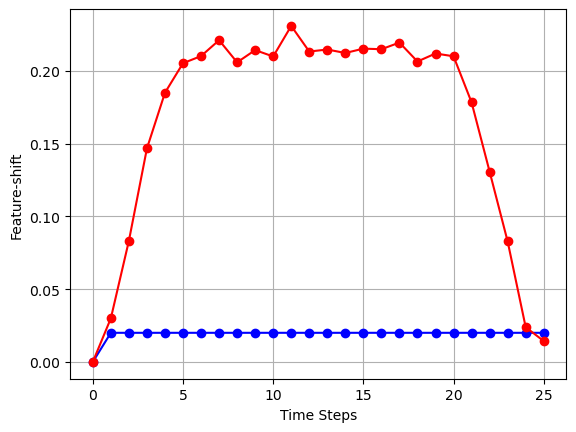

In [7]:
# initialize
time_steps = np.arange(0, 26)
mean_distance_from_initialization = []
mean_pairwise_distance_all = []
mean_pairwise_distance_neighbors = []
mean_pairwise_distance_non_neighbors = [] 
mmd_from_first_to_tth_nodes_high = []
mmd_from_first_to_tth_nodes_low = []

# simulate
csbm_feat_high = CSBMFeat(n=n, dimensions=dimensions, sigma_square=0.1, classes=10)
csbm_feat_low = CSBMFeat(n=n, dimensions=dimensions, sigma_square=1e-50, classes=10)
for t in range(26):
    mmd_from_first_to_tth_nodes_high.append(mmd_rbf(csbm_feat_high.X[:n], csbm_feat_high.X[-n:], gamma))
    mmd_from_first_to_tth_nodes_low.append(mmd_rbf(csbm_feat_low.X[:n], csbm_feat_low.X[-n:], gamma))
    mean_pairwise_distance_all.append(get_pairwise_mean_distance(csbm_feat_high))
    mean_distance_from_initialization.append(get_mean_initialiation_distance(csbm_feat_high))
    mean_pairwise_distance_neighbors.append(get_pairwise_neighbor_mean_distance(csbm_feat_high))
    mean_pairwise_distance_non_neighbors.append(get_pairwise_non_neighbor_mean_distance(csbm_feat_high))
    csbm_feat_high.evolve()
    csbm_feat_low.evolve()

    # plot
plt.plot(time_steps, mmd_from_first_to_tth_nodes_high, marker='o', linestyle='-', color='b')
plt.plot(time_steps, mmd_from_first_to_tth_nodes_low, marker='o', linestyle='-', color='r')
plt.xlabel('Time Steps')
plt.ylabel('Feature-shift')
plt.grid(True)
plt.savefig('feature_shift.svg', format='svg')
plt.show()
plt.close()

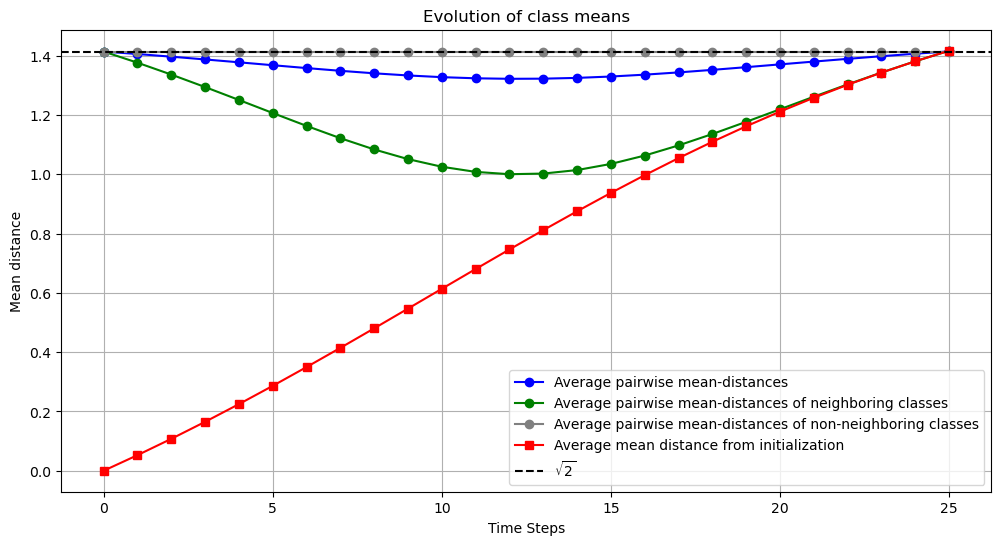

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(time_steps, mean_pairwise_distance_all, marker='o', linestyle='-', color='b', label='Average pairwise mean-distances')
plt.plot(time_steps, mean_pairwise_distance_neighbors, marker='o', linestyle='-', color='green', label='Average pairwise mean-distances of neighboring classes')
plt.plot(time_steps, mean_pairwise_distance_non_neighbors, marker='o', linestyle='-', color='gray', label='Average pairwise mean-distances of non-neighboring classes')
plt.plot(time_steps, mean_distance_from_initialization, marker='s', linestyle='-', color='r', label='Average mean distance from initialization')
plt.axhline(y=math.sqrt(2), color='black', linestyle='--', label=r'$\sqrt{2}$')

plt.title('Evolution of class means')
plt.xlabel('Time Steps')
plt.ylabel('Mean distance')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('class_means.svg', format='svg')
plt.show()
plt.close()